In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Importing libraries
import pandas as pd
import os
import pickle

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from src.models import parameter_learning as lfi
from src.models import build_model as build
from src.models import model_schemata as schema
from src.models import inference as inf
from src.visualization import visualize as viz

In [3]:
os.chdir('/Users/magdalena/OneDrive - Queen Mary, University of London/bezzlab/research/projects/phospho_pi/')
# os.chdir('/home/mhuebner/Desktop/bezzlab/research/projects/phospho_pi/')

In [4]:
experiments = ['exp1_100i', 'exp2_100i']

In [5]:
data = {}
for exp in experiments:
    with open(f'models/ebdt_data/sub_network/e_model/predictions_marginf_{exp}.pkl', 'rb') as f:
        data[exp] = pickle.load(f)

#### Evaluation of learned parameters

Average JSD per experiment pair

In [6]:
predicates = ['e_activity']

jsd_dict = {}

# Iterate over predicates
for pred in predicates:
    jsd_dict[pred] = lfi.compare_jsds(pred, experiments, data)

Average fraction of MaxMatch per experiment pair

In [7]:
predicates = ['e_activity']

max_dict = {}

# Iterate over predicates
for pred in predicates:
    max_dict[pred] = lfi.compare_max_categories(pred, experiments, data)

#### Compare AUC (all experiments)

In [8]:
experiments = ['exp1_100i', 'exp2_100i']

In [9]:
data = {}
for exp in experiments:
    with open(f'models/ebdt_data/sub_network/e_model/predictions_marginf_{exp}.pkl', 'rb') as f:
        data[exp] = pickle.load(f)

In [10]:
e_ksea = pd.read_csv('data/processed/ebdt_data/sub_network_e/e_ksea.csv')

In [11]:
e_ksea['p_base'] = 1 - e_ksea['p_dec'] - e_ksea['p_inc']
e_ksea.loc[e_ksea['p_base'] < 0, 'p_base'] = 0

In [12]:
analysis_dicts_0 = inf.prep_experiments_for_auc(data, e_ksea, result_type='e_activity', y_true_type='e_ksea', threshold=0)
analysis_dicts_80 = inf.prep_experiments_for_auc(data, e_ksea, result_type='e_activity', y_true_type='e_ksea', threshold=0.8)

In [13]:
y_onehot_test_list_0 = []
y_score_list_0 = []
experiment_names = []
for exp in analysis_dicts_0.keys():
    y_onehot_test_list_0.append(analysis_dicts_0[exp]['y_onehot_test'])
    y_score_list_0.append(analysis_dicts_0[exp]['y_score'])
    experiment_names.append(exp)

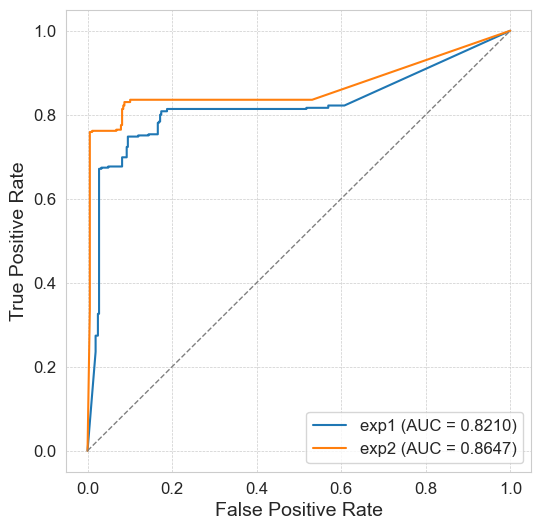

In [17]:
viz.plot_micro_average_roc_seaborn(y_onehot_test_list_0, y_score_list_0, experiment_names)

In [14]:
y_onehot_test_list_80 = []
y_score_list_80 = []
experiment_names = []
for exp in analysis_dicts_80.keys():
    y_onehot_test_list_80.append(analysis_dicts_80[exp]['y_onehot_test'])
    y_score_list_80.append(analysis_dicts_80[exp]['y_score'])
    experiment_names.append(exp)

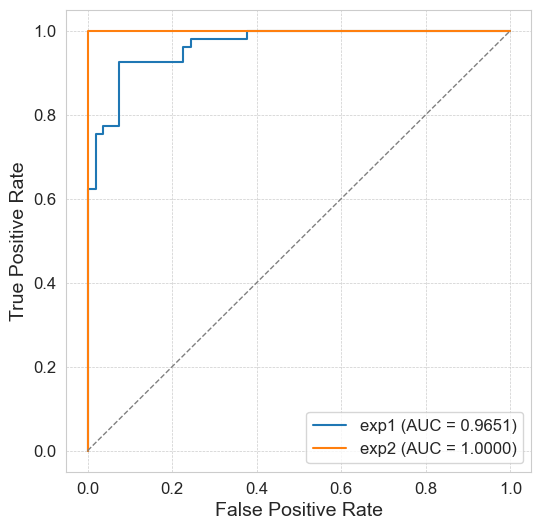

In [19]:
viz.plot_micro_average_roc_seaborn(y_onehot_test_list_80, y_score_list_80, experiment_names)

In [15]:
y_onehot_test_list = []
y_score_list = []
experiment_names = []
for exp in analysis_dicts_0.keys():
    y_onehot_test_list.append(analysis_dicts_0[exp]['y_onehot_test'])
    y_score_list.append(analysis_dicts_0[exp]['y_score'])
    experiment_names.append(exp)
for exp in analysis_dicts_80.keys():
    y_onehot_test_list.append(analysis_dicts_80[exp]['y_onehot_test'])
    y_score_list.append(analysis_dicts_80[exp]['y_score'])
    experiment_names.append(f'{exp}_p>0.8')

In [18]:
experiment_names = ['exp1', 'exp2', 'exp1_p>0.8', 'exp2_p>0.8']

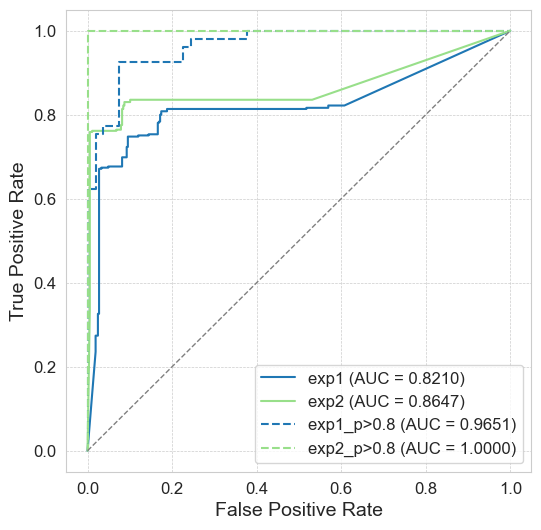

In [21]:
viz.plot_micro_average_roc_seaborn_paired(y_onehot_test_list, y_score_list, experiment_names)

Plot exp 5 and 11 density (fc) and 4 (uncertain evidence)
Potentially label by number of parents? Pick out mismatch lower/higher end and visualise with bayesialab

In [22]:
# Extracting data from your analysis dictionary
x1 = analysis_dicts_0['exp1_100i']['analysis_dataframe']['prob']
y1 = analysis_dicts_0['exp1_100i']['analysis_dataframe']['JSD']
mask_no_match1 = analysis_dicts_0['exp1_100i']['analysis_dataframe']['MaxMatch'] == 0

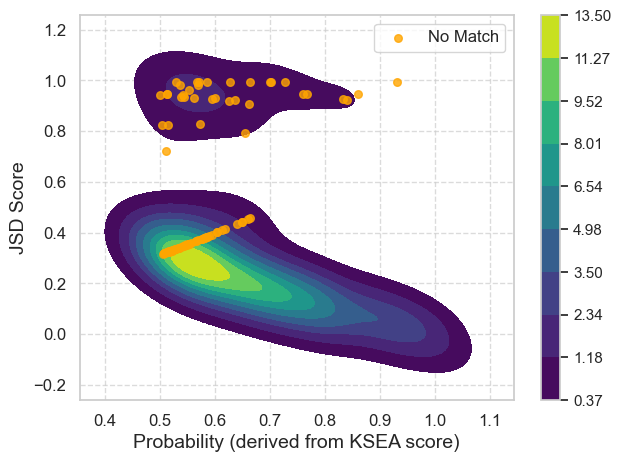

In [23]:
sns.set(style="whitegrid")  # Start with a white grid style

plt.figure(figsize=(7, 5), dpi=100)

# Create the kdeplot
sns.kdeplot(x=x1, y=y1, cmap='viridis', fill=True, levels=10, cbar=True)

# Scatter plot for 'MaxMatch' == 0 (Non Matches)
plt.scatter(x1[mask_no_match1], y1[mask_no_match1], c='orange', s=30, alpha=0.8, label='No Match')

# Scatter plot for 'tc' < 5
# plt.scatter(x[mask_tc_lt_5], y[mask_tc_lt_5], c='blue', s=20, alpha=0.8, marker='x', label='tc < 5')

# Increase the legibility of the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding labels, title, and legend
plt.xlabel('Probability (derived from KSEA score)', fontsize=14)
plt.ylabel('JSD Score', fontsize=14)
plt.legend(loc='upper right', fontsize=12)

# Enhance readability
plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()  # Adjusts the plot to ensure everything fits well

# Display the plot
plt.show()

In [32]:
# Extracting data from your analysis dictionary
x2 = analysis_dicts_0['exp2_100i']['analysis_dataframe']['prob']
y2 = analysis_dicts_0['exp2_100i']['analysis_dataframe']['JSD']
mask_no_match2 = analysis_dicts_0['exp2_100i']['analysis_dataframe']['MaxMatch'] == 0
mask_match2 = analysis_dicts_0['exp2_100i']['analysis_dataframe']['MaxMatch'] == 1

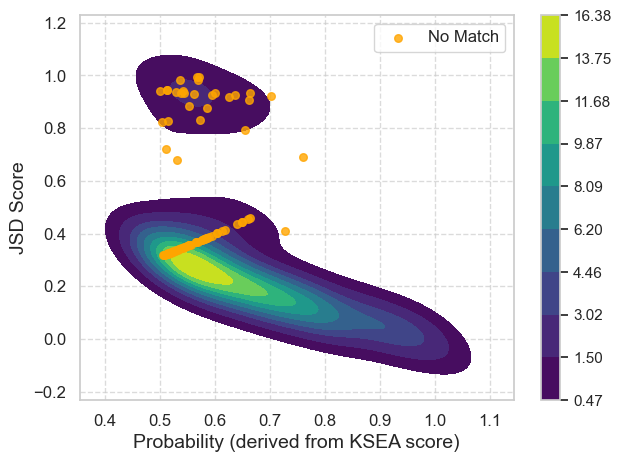

In [25]:
sns.set(style="whitegrid")  # Start with a white grid style

plt.figure(figsize=(7, 5), dpi=100)

# Create the kdeplot
sns.kdeplot(x=x2, y=y2, cmap='viridis', fill=True, levels=10, cbar=True)

# Scatter plot for 'MaxMatch' == 0 (Non Matches)
plt.scatter(x2[mask_no_match2], y2[mask_no_match2], c='orange', s=30, alpha=0.8, label='No Match')

# Scatter plot for 'tc' < 5
# plt.scatter(x[mask_tc_lt_5], y[mask_tc_lt_5], c='blue', s=20, alpha=0.8, marker='x', label='tc < 5')

# Increase the legibility of the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding labels, title, and legend
plt.xlabel('Probability (derived from KSEA score)', fontsize=14)
plt.ylabel('JSD Score', fontsize=14)
plt.legend(loc='upper right', fontsize=12)

# Enhance readability
plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()  # Adjusts the plot to ensure everything fits well

# Display the plot
plt.show()

In [33]:
mismatch_df = analysis_dicts_0['exp2_100i']['analysis_dataframe'][mask_no_match2]
match_df = analysis_dicts_0['exp2_100i']['analysis_dataframe'][mask_match2]

In [38]:
table1 = match_df[(match_df['enzyme'] == 'ABL1') & (match_df['max_category_e_activity'] == 'p_inc')].sort_values(by=['prob'], ascending=[False])
table1 = table1[['enzyme', 'sample', 'tc', 'max_category_e_ksea', 'prob', 'max_category_e_activity', 'JSD']]
table1

,enzyme,sample,tc,max_category_e_ksea,prob,max_category_e_activity,JSD
326,ABL1,GDC0994,10.0,p_inc,0.866138,p_inc,0.070395
320,ABL1,LY2584702,10.0,p_inc,0.825872,p_inc,0.093062
317,ABL1,AZD6482,10.0,p_inc,0.810766,p_inc,0.101763
296,ABL1,CX4945,10.0,p_inc,0.780265,p_inc,0.119674
285,ABL1,Ipatasertib,10.0,p_inc,0.757748,p_inc,0.133206
284,ABL1,Tofacitinib,10.0,p_inc,0.756603,p_inc,0.133902
271,ABL1,Dabrafenib,10.0,p_inc,0.736770,p_inc,0.146060
268,ABL1,AZD5363,10.0,p_inc,0.730570,p_inc,0.149906
261,ABL1,KN93,10.0,p_inc,0.718589,p_inc,0.157401
258,ABL1,DNAPK,10.0,p_inc,0.712613,p_inc,0.161170


In [29]:
table2 = mismatch_df[mismatch_df['tc'] == 'ABL1'].sort_values(by=['prob'], ascending=[False])
table2 = table2[['enzyme', 'sample', 'tc', 'max_category_e_ksea', 'prob', 'max_category_e_activity', 'JSD']]
table2

,enzyme,sample,tc,max_category_e_ksea,prob,max_category_e_activity,JSD
0,ABL1,PH797804,10.0,p_dec,0.571291,p_inc,0.994295
19,ABL1,LY2090314,10.0,p_inc,0.553053,p_dec,0.882442
27,ABL1,Trametinib,10.0,p_dec,0.531715,p_inc,0.678828


In [ ]:
analysis_dicts_0['exp2_100i']['analysis_dataframe']

In [ ]:
# ABL1	Dasatinib, GDC0941: match and decrease

# ABL1	Dabrafenib: match but increase
# ABL1	PH797804: no inhibitor, but low probability and mismatch